In [1]:
import fastf1 as ff1
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Enable the cache
ff1.Cache.enable_cache('/home/rajaahdjey/Documents/DS_Proj/GitHub/F1 Analysis/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [3]:
# Load the session data
race = ff1.get_session(2022, 'Saudi Arabian','Q')
race.load(telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22', '1']


In [4]:
laps_data = race.laps
drivers = laps_data['Driver'].unique()

In [5]:
lec_lap = race.laps.pick_driver('LEC').pick_fastest()
per_lap = race.laps.pick_driver('PER').pick_fastest()

In [6]:
lec_tel = lec_lap.get_telemetry().add_distance()
per_tel = per_lap.get_telemetry().add_distance()

In [7]:
lec_pos = lec_lap.get_pos_data()

In [8]:
lec_tel = lec_lap.get_telemetry()

In [9]:
per_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2022-03-26 19:03:36.063,0 days 02:18:00.120000,,422.180278,0 days 00:00:00,11117,311,8,100,False,12,interpolation,0.000010,OnTrack,-1299,240,117,0.000000
3,2022-03-26 19:03:36.099,0 days 02:18:00.156000,,422.180278,0 days 00:00:00.036000,11123,312,8,100,False,12,car,0.000522,OnTrack,-1309,268,117,3.120000
4,2022-03-26 19:03:36.272,0 days 02:18:00.329000,,422.180278,0 days 00:00:00.209000,11191,313,8,100,False,12,pos,0.002996,OnTrack,-1363,415,118,18.161389
5,2022-03-26 19:03:36.499,0 days 02:18:00.556000,77,422.180278,0 days 00:00:00.436000,11260,315,8,100,False,12,car,0.006256,OnTrack,-1443,632,118,38.023889
6,2022-03-26 19:03:36.532,0 days 02:18:00.589000,77,416.346944,0 days 00:00:00.469000,11272,315,8,100,False,12,pos,0.006730,OnTrack,-1454,660,118,40.911389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2022-03-26 19:05:03.899,0 days 02:19:27.956000,77,327.490556,0 days 00:01:27.836000,10973,308,8,100,False,12,car,0.993254,OnTrack,-1200,-43,117,6056.649722
664,2022-03-26 19:05:03.973,0 days 02:19:28.030000,77,325.200139,0 days 00:01:27.910000,11007,308,8,100,False,12,pos,0.994294,OnTrack,-1221,16,118,6062.980833
665,2022-03-26 19:05:04.138,0 days 02:19:28.195000,77,322.909722,0 days 00:01:28.075000,11042,309,8,100,False,12,car,0.996614,OnTrack,-1267,150,118,6077.143333
666,2022-03-26 19:05:04.233,0 days 02:19:28.290000,77,322.909722,0 days 00:01:28.170000,11055,309,8,100,False,12,pos,0.997953,OnTrack,-1295,228,118,6085.297500


NameError: name 'compare_tel' is not defined

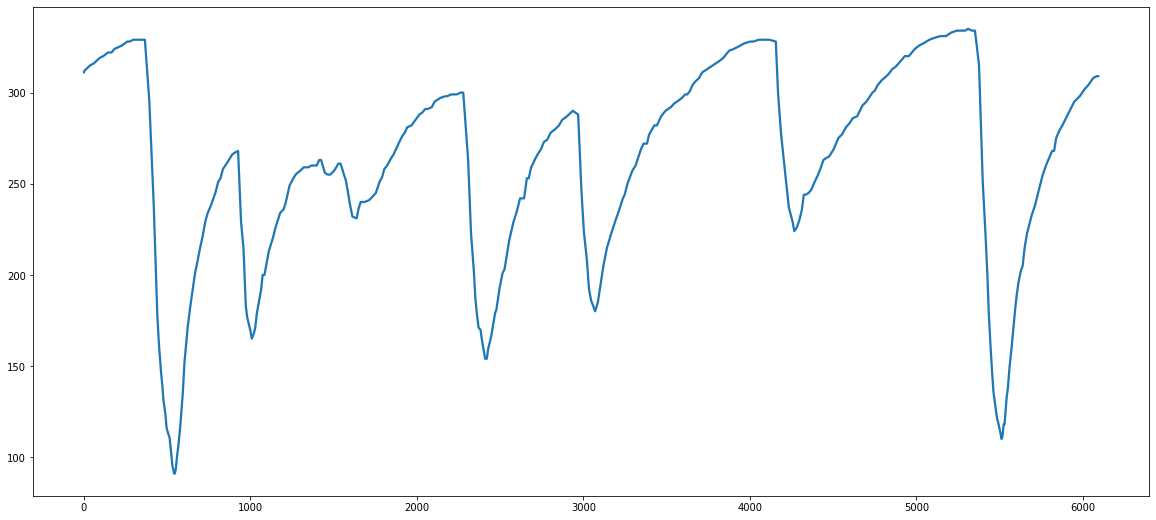

In [10]:
#example from documentation modified for this data : https://theoehrly.github.io/Fast-F1/utils.html
from fastf1 import utils
delta_time, per_tel_as_ref, compare_tel_with_leclerc = utils.delta_time(per_lap, lec_lap)


fig, ax = plt.subplots(figsize=(20,9))
sns.set_style('white')
sns.set_context('talk')
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(per_tel_as_ref['Distance'], per_tel_as_ref['Speed'])
ax.plot(compare_tel['Distance'], compare_tel['Speed'])

twin = ax.twinx()
twin.set(ylim=(-0.4,0.4));
twin.plot(per_tel_as_ref['Distance'], delta_time, '--', color='green')
twin.set_ylabel("<-- Lec ahead | Per ahead -->")
plt.savefig("time_delta.png")

In [ ]:
delta_time

In [ ]:
per_tel_as_ref

In [ ]:
race.laps["Sector1Time"].dt.total_seconds()

In [ ]:
telemetry = per_tel.append(lec_tel)

In [ ]:
per_speed = pd.DataFrame()
per_speed["Time"] = per_tel["Time"]
per_speed["Distance"] = per_tel["Distance"]
lec_speed = pd.DataFrame()
lec_speed["Time"] = lec_tel["Time"]
lec_speed["Distance"] = lec_tel["Distance"]

In [ ]:
lec_tel.at[330,"Time"] = lec_lap["LapTime"]

In [ ]:
per_tel.at[325,"Distance"] = 6174
per_tel.at[325,"Time"] = per_lap["LapTime"]

In [ ]:
lec_lap["LapTime"]

In [ ]:
diff_total = (per_lap["LapTime"]-lec_lap["LapTime"]).total_seconds()
diff_s1 = (per_lap["Sector1Time"]-lec_lap["Sector1Time"]).total_seconds()
diff_s2 = (per_lap["Sector2Time"]-lec_lap["Sector2Time"]).total_seconds()
diff_s3 = (per_lap["Sector3Time"]-lec_lap["Sector3Time"]).total_seconds()
print(f"Total diff vs sector diff = {diff_total} vs {diff_s1} ; {diff_s2} ; {diff_s3}")


In [ ]:
diff_total

In [ ]:
lec_tel.tail()

##### lec_lap.get_car_pos()

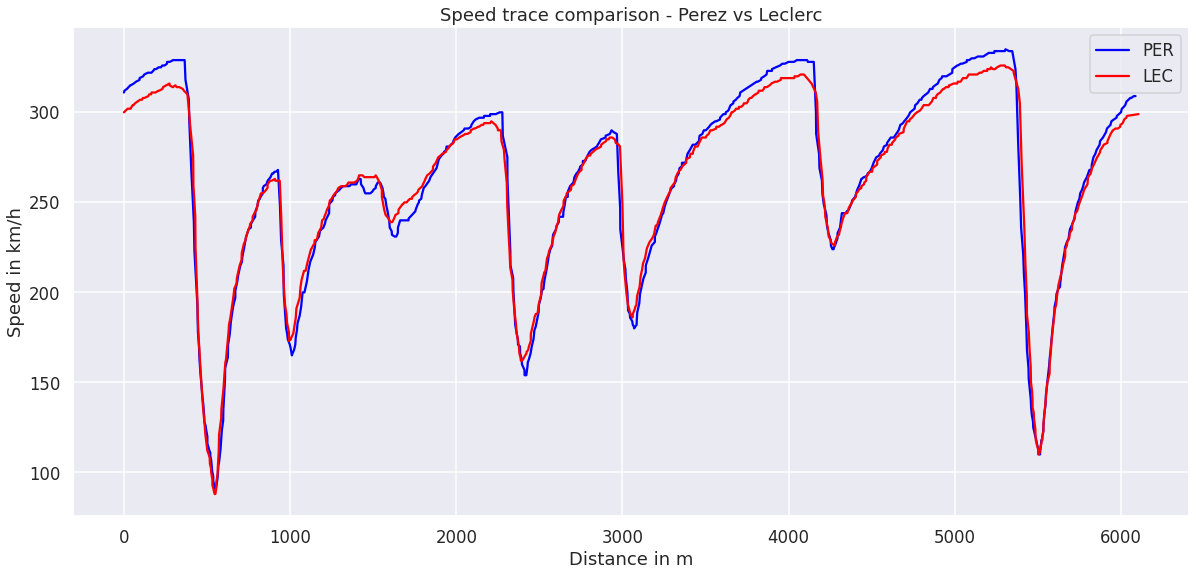

In [85]:
fig, ax = plt.subplots(figsize=(20,9))
sns.set_style('darkgrid')
sns.lineplot(ax = ax, x = per_tel['Distance'], y = per_tel['Speed'],label='PER',color='blue')
sns.lineplot(ax = ax, x = lec_tel['Distance'], y = lec_tel['Speed'],label='LEC',color='red')
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.set_title('Speed trace comparison - Perez vs Leclerc');
plt.savefig("Speed trace comparison.png")

<AxesSubplot:xlabel='Y', ylabel='X'>

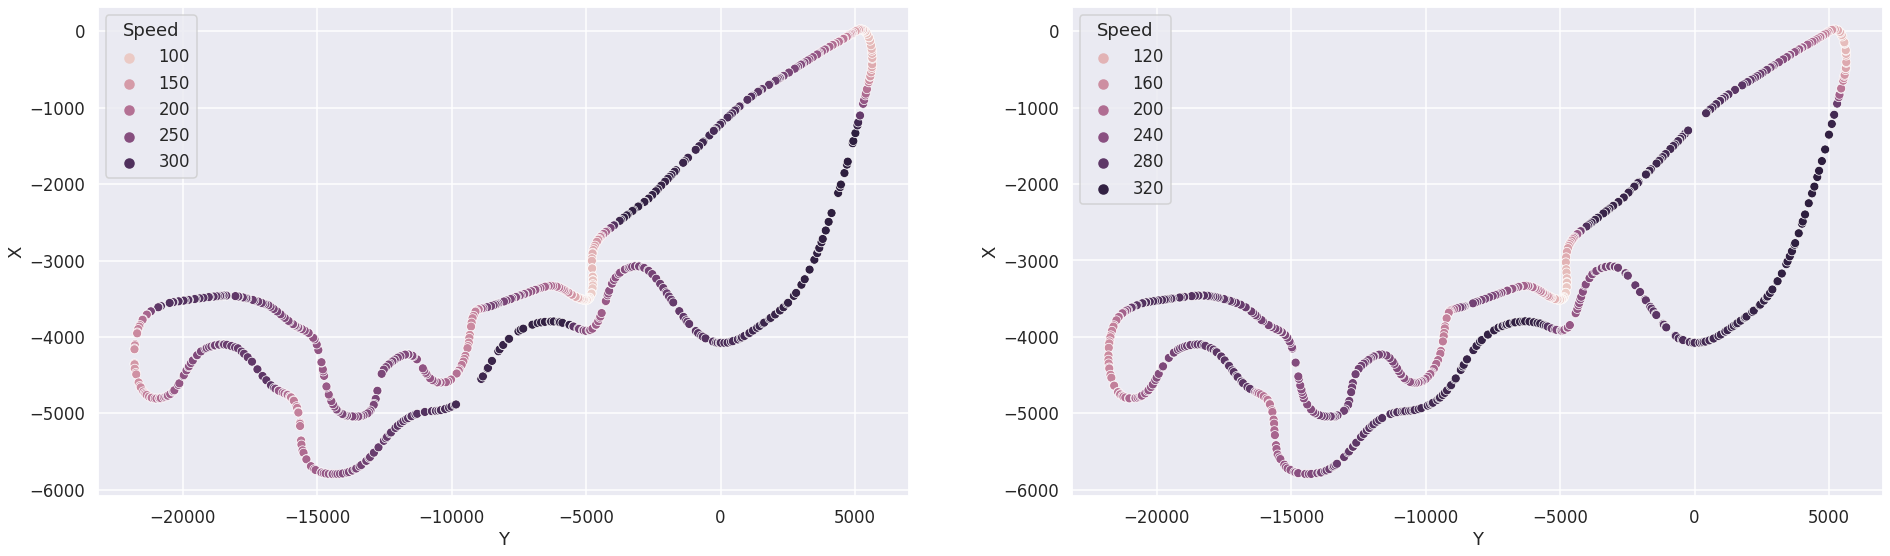

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(32,9))
sns.set_style('darkgrid')
sns.scatterplot(ax = ax[0], x = per_tel['Y']*-1, y = per_tel['X'],hue=per_tel["Speed"],hue_norm=(per_tel["Speed"].min(),per_tel["Speed"].max()))
sns.scatterplot(ax = ax[1], x = lec_tel['Y']*-1, y = lec_tel['X'],hue=lec_tel["Speed"],hue_norm=(lec_tel["Speed"].min(),lec_tel["Speed"].max()))

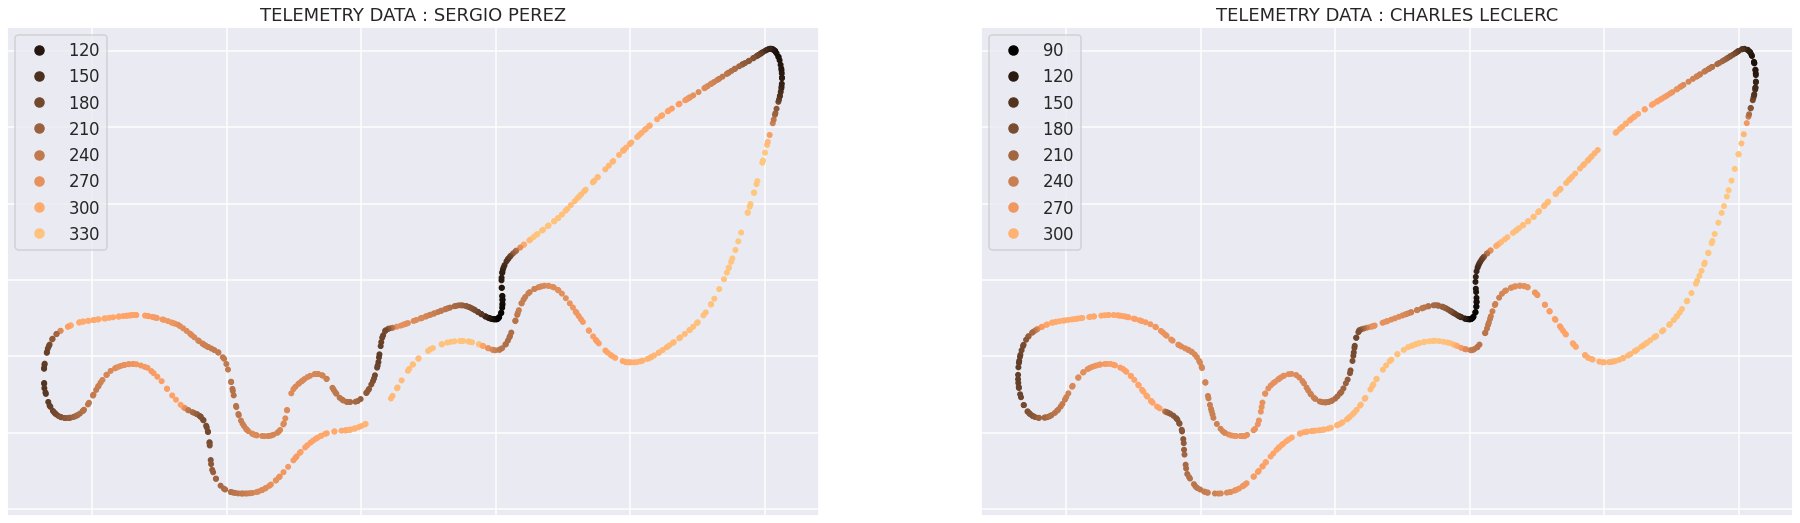

In [80]:
#reference for adding legends : https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend
#reference for adding titles to subplots : https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib

import matplotlib
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(32,9))
g = ax[0].scatter(per_tel['Y']*-1,per_tel['X'],c = per_tel["Speed"],vmin = per_tel["Speed"].min(),vmax = per_tel["Speed"].max(),s=20,cmap=matplotlib.cm.copper)
h = ax[1].scatter(lec_tel['Y']*-1,lec_tel['X'],c = lec_tel["Speed"],vmin = lec_tel["Speed"].min(),vmax = lec_tel["Speed"].max(),s=20,cmap=matplotlib.cm.copper)
ax[0].legend(*g.legend_elements())
ax[1].legend(*h.legend_elements())
ax[0].set_title("TELEMETRY DATA : SERGIO PEREZ")
ax[1].set_title("TELEMETRY DATA : CHARLES LECLERC")
#remove ticklabels for cleaner plot
ax[0].axes.xaxis.set_ticklabels([])
ax[0].axes.yaxis.set_ticklabels([])
ax[1].axes.xaxis.set_ticklabels([])
ax[1].axes.yaxis.set_ticklabels([])
plt.savefig("telemetry location comparison.png")

In [63]:
per_tel["Speed"].max()

335

In [64]:
lec_tel["Speed"].max()

326